In [ ]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# tells matplotlib to embed plots within the notebook
%matplotlib inline

# Python-based data analysis toolkit ranging from parsing multiple file formats to converting an entire data table into a NumPy matrix array.
import pandas as pd

# Package in pandas to create a dataframe
from pandas import DataFrame

# Package in Scikit Learn to perform K-Nearest-Neighbours (KNN) algorithm 
from sklearn.neighbors import KNeighborsClassifier

# Package in Scikit Learn to separate datasets into training set and testing set based on proportion
from sklearn.model_selection import train_test_split

# Package in Scikit Learn provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.
from sklearn import preprocessing

# Package in Scikit Learn to perform confusion matrix, classification report and accuracy score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

# Python-based data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# A module in Python having a collection of functions that are used for handling iterators. They make iterating through the iterables like lists and strings very easily. 
from itertools import chain

#The Python Math Library provides us access to some common math functions and constants in Python, which we can use throughout our code for more complex mathematical computations. 
import math

# Set of efficient functions corresponding to the intrinsic operators of Python.
import operator

# Package in Scikit Learn, Receiver Operating Characteristic (ROC) curve metric to evaluate classifier output quality. 
from sklearn.metrics import roc_curve

# Package in Scikit Learn use to compute Area Under the Curve (AUC) using the trapezoidal rule.
from sklearn.metrics import auc

In [ ]:
# Reading the dataset with .csv format
# Using pandas library

data=pd.read_csv("Cat4.csv")

# Have a look of the loaded dataset

print(data.info)

# 200 training sets with 8 features


<bound method DataFrame.info of            Cat Species  Gender  Age (Year(s))  Fur Color  Tameness  \
0    British Shorthair    Male            9.5      Black       5.4   
1    British Shorthair  Female            9.4  Chocolate       1.0   
2    British Shorthair    Male            6.3       Gray       2.1   
3    British Shorthair    Male            7.2   Cinnamon       2.5   
4    British Shorthair  Female            8.1       Fawn       1.1   
..                 ...     ...            ...        ...       ...   
195            Ragdoll  Female            9.7   Lavender       8.7   
196            Ragdoll  Female           11.9      White       7.5   
197            Ragdoll  Female           10.8      Cream       9.7   
198            Ragdoll  Female           13.3      Lilac       8.6   
199            Ragdoll  Female            9.4     Orange       6.8   

     Disease Vaccination  Weight (Kg) Breed (P/M)  
0                      1          7.5        Pure  
1                      

In [ ]:
# Try with other feature's name to see the list of objects exist in the column
# Return array of objects in named feature's column

data['Cat Species'].unique()

array(['British Shorthair', 'Cyprus', 'Foldex', 'German Rex',
       'American Curl', 'Birman', 'Persian', 'Ragdoll'], dtype=object)

In [ ]:
# Checking if any of value in datasets (Pandas DataFrame) is NAN or NA
# Return True if there is NA value
# Return False otherwise

data.isnull().values.any()

False

In [ ]:
# Process of encoding/map the categorical values in datasets to numeric values
# "Cat Species", "Gender", "Fur Color", "Breed (P/M)" are involved
# run only once, read data again and run code if shows <na>

# "Cat Species" range from 0 to 7
data['Cat Species'] = data['Cat Species'].map({'British Shorthair' :0,'Cyprus' :1,'Foldex' :2,'German Rex' :3,'American Curl' :4, 'Birman' :5, 'Persian' :6, 'Ragdoll' :7}).astype(int) 

# "Gender" range from 0 to 1
data['Gender'] = data['Gender'].map({'Male' :0, 'Female' :1}).astype(int)

#"Fur Color" range from 0 to 9
data['Fur Color'] = data['Fur Color'].map({'Black' :0, 'Lavender' :5, 'White' :6, 'Cream' :7, 'Cinnamon' :3, 'Chocolate' :1,'Orange' :9, 'Lilac' :8, 'Gray' :2, 'Fawn' :4}).astype(int)

# "Breed (P/M)" range from 0 to 1
data['Breed (P/M)']= data['Breed (P/M)'].map({'Pure' :0, 'Mixed' :1}).astype(int)

# Have a look of datasets after encoding/mapping process 
data

,Cat Species,Gender,Age (Year(s)),Fur Color,Tameness,Disease Vaccination,Weight (Kg),Breed (P/M)
0,0,0,9.5,0,5.4,1,7.5,0
1,0,1,9.4,1,1.0,0,7.3,0
2,0,0,6.3,2,2.1,0,12.5,0
3,0,0,7.2,3,2.5,0,12.7,0
4,0,1,8.1,4,1.1,1,11.0,0
...,...,...,...,...,...,...,...,...
195,7,1,9.7,5,8.7,1,17.1,0
196,7,1,11.9,6,7.5,1,12.8,1
197,7,1,10.8,7,9.7,1,15.1,0
198,7,1,13.3,8,8.6,1,17.9,0


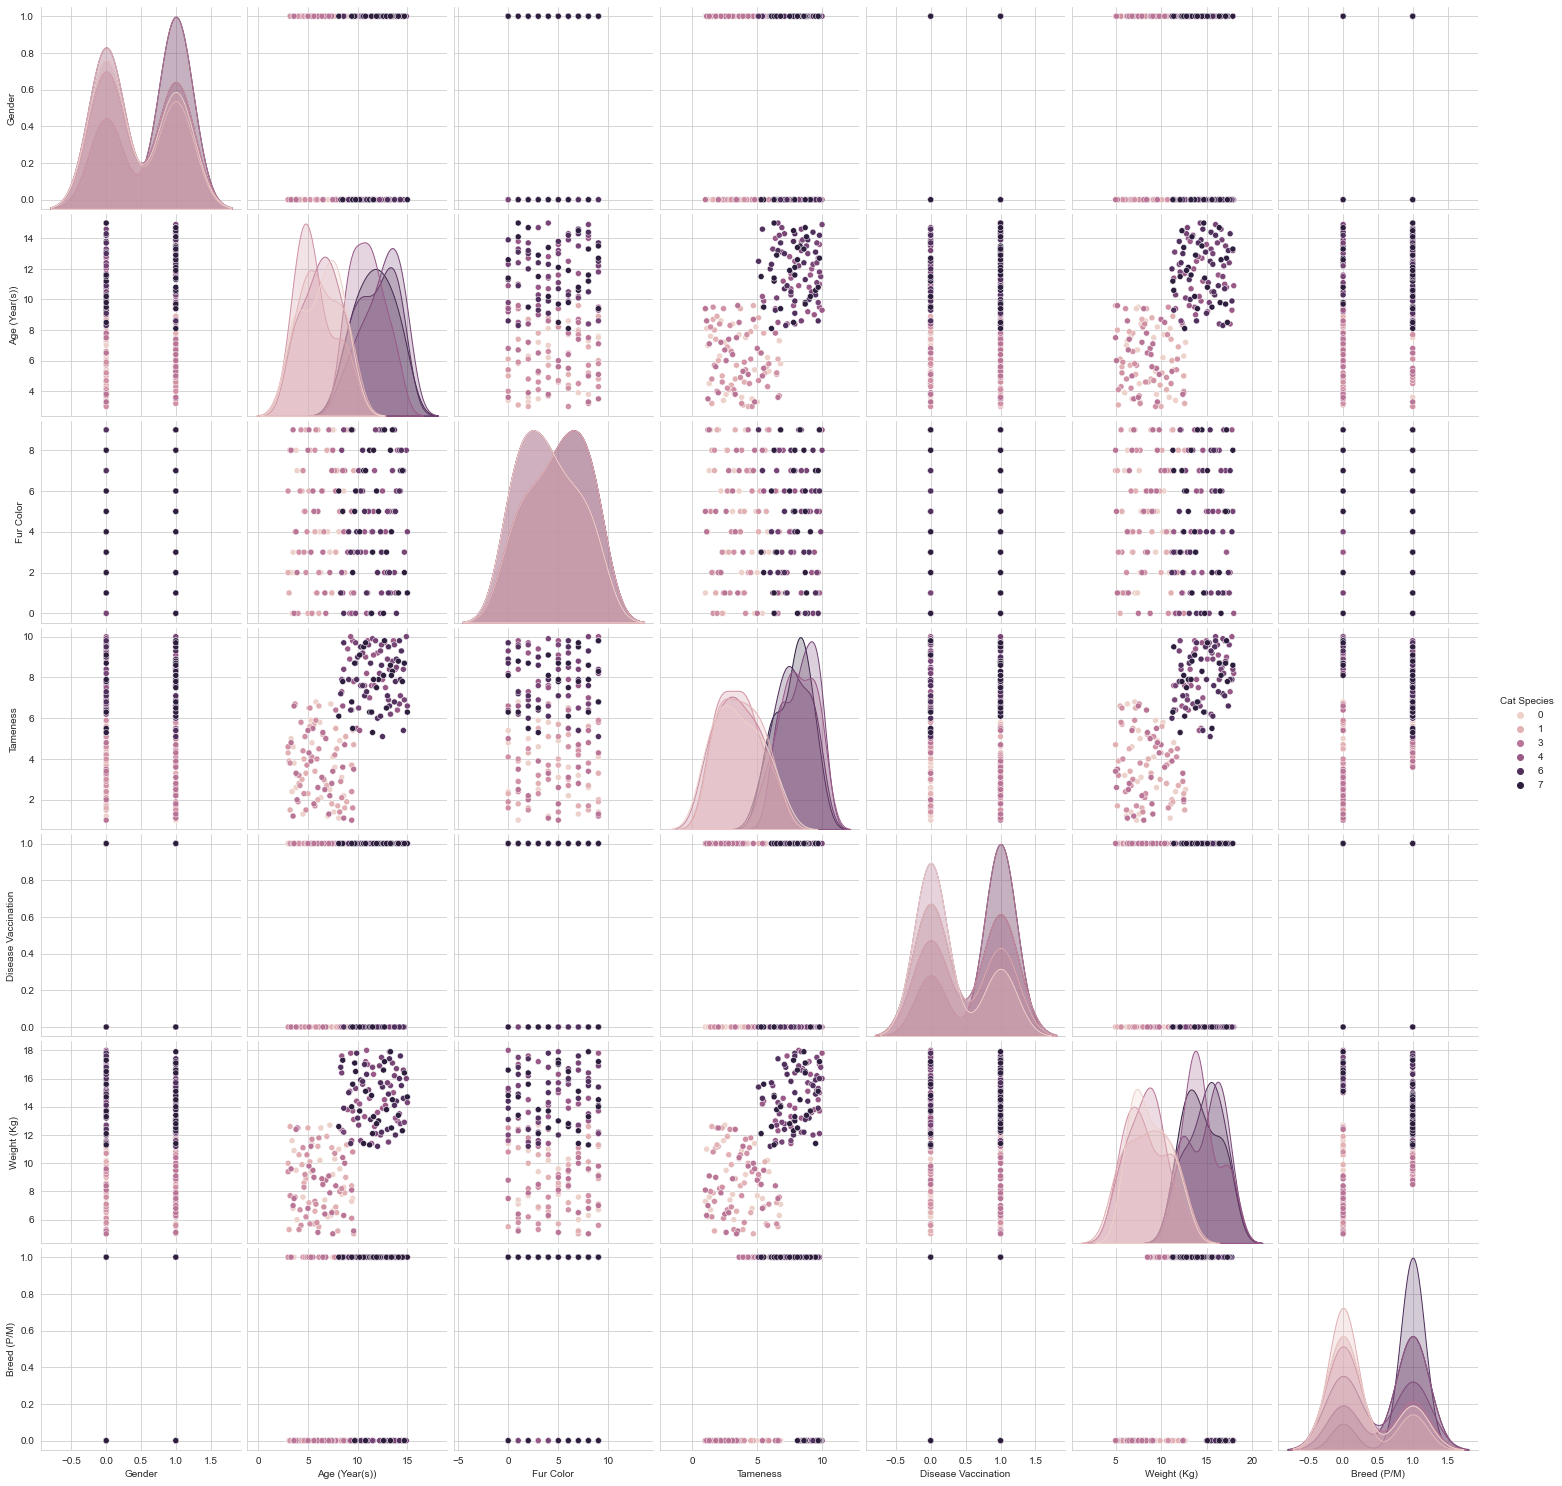

In [ ]:
# Using pyplot from matplotlib
# and Seaborn library for data visualisation

plt.close();
sns.set_style("whitegrid");
sns.pairplot(data, hue="Cat Species", height=3);
plt.show()

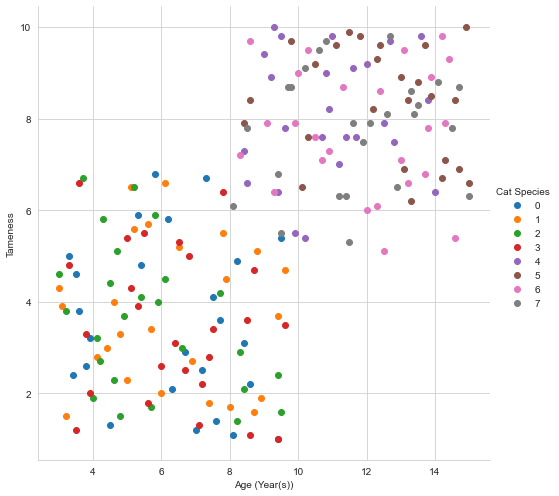

In [ ]:
# You can change whatever features you like for more clearer visualisation
# List of features to choose from:
# "Cat Species"
# "Gender"
# "Age (Year(s))"
# "Fur Color"
# "Tameness"
# "Disease Vaccination"
# "Weight (Kg)"

sns.set_style("whitegrid");
sns.FacetGrid(data, hue = 'Cat Species', height=7).map(plt.scatter,"Age (Year(s))", "Tameness").add_legend();
plt.show()

In [ ]:
# Subseting feature for X_data and y 
# X_data contains "Cat Species","Gender","Age (Year(s))","Fur Color","Tameness","Disease Vaccination","Weight (Kg)"
# y contains 'Breed (P/M)'

X_data = data.drop(['Breed (P/M)'],axis=1)

y = data['Breed (P/M)']

In [ ]:
# Have a look of X_data (200 rows x 7 columns)

print(X_data)

     Cat Species  Gender  Age (Year(s))  Fur Color  Tameness  \
0              0       0            9.5          0       5.4   
1              0       1            9.4          1       1.0   
2              0       0            6.3          2       2.1   
3              0       0            7.2          3       2.5   
4              0       1            8.1          4       1.1   
..           ...     ...            ...        ...       ...   
195            7       1            9.7          5       8.7   
196            7       1           11.9          6       7.5   
197            7       1           10.8          7       9.7   
198            7       1           13.3          8       8.6   
199            7       1            9.4          9       6.8   

     Disease Vaccination  Weight (Kg)  
0                      1          7.5  
1                      0          7.3  
2                      0         12.5  
3                      0         12.7  
4                      1       

In [ ]:
# Have a look of y (200 rows x 1 column)

print(y)

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    1
197    0
198    0
199    1
Name: Breed (P/M), Length: 200, dtype: int32


In [ ]:
# Using MinMaxScaler in preprocessing package to perform minmax scaling
# Xsc = (X - Xmin)/ (Xmax - Xmin)

MinMaxScaler = preprocessing.MinMaxScaler()
X = MinMaxScaler.fit_transform(X_data)
newdata = pd.DataFrame(X ,columns=['Cat Species', 'Gender', 'Age (years)', 'Fur Color', 'Tameness', 'Disease Vaccination', 'Weight (kg)'])

# Have a look of datasets after minmax scaling 
newdata

,Cat Species,Gender,Age (years),Fur Color,Tameness,Disease Vaccination,Weight (kg)
0,0.0,0.0,0.541667,0.000000,0.488889,1.0,0.192308
1,0.0,1.0,0.533333,0.111111,0.000000,0.0,0.176923
2,0.0,0.0,0.275000,0.222222,0.122222,0.0,0.576923
3,0.0,0.0,0.350000,0.333333,0.166667,0.0,0.592308
4,0.0,1.0,0.425000,0.444444,0.011111,1.0,0.461538
...,...,...,...,...,...,...,...
195,1.0,1.0,0.558333,0.555556,0.855556,1.0,0.930769
196,1.0,1.0,0.741667,0.666667,0.722222,1.0,0.600000
197,1.0,1.0,0.650000,0.777778,0.966667,1.0,0.776923
198,1.0,1.0,0.858333,0.888889,0.844444,1.0,0.992308


In [ ]:
# Spliting datasets into training set and testing set with portion 0.8 : 0.2
# Random state controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls.

X_train, X_test, y_train, y_test = train_test_split(newdata, y,test_size=0.2, random_state = 1)

# Spliting the training set into training set and cross validation set with portion 0.75 : 0.25
# 0.25 x 0.8 = 0.2

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

# So, final portion is training set 0.6: testing set 0.2: cross validation set 0.2


In [ ]:
# Using KNN algorithms from Scikit Learn library
# Set K value = 5

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict ypred from X_test
# Predict ypredval from X_val

ypred = classifier.predict(X_test)
ypredval = classifier.predict(X_val)


In [ ]:
# Have a look of X_test (X testing set)

X_test


,Cat Species,Gender,Age (years),Fur Color,Tameness,Disease Vaccination,Weight (kg)
58,0.285714,1.0,0.016667,0.888889,0.311111,1.0,0.207692
40,0.142857,1.0,0.258333,0.000000,0.622222,1.0,0.038462
34,0.142857,0.0,0.483333,0.444444,0.455556,1.0,0.307692
102,0.571429,0.0,0.450000,0.222222,0.700000,0.0,0.969231
184,1.000000,0.0,0.600000,0.444444,0.900000,0.0,0.669231
198,1.000000,1.0,0.858333,0.888889,0.844444,1.0,0.992308
95,0.428571,1.0,0.216667,0.555556,0.088889,1.0,0.307692
4,0.000000,1.0,0.425000,0.444444,0.011111,1.0,0.461538
29,0.142857,1.0,0.150000,1.000000,0.255556,0.0,0.300000
168,0.857143,1.0,0.625000,0.888889,0.733333,0.0,0.830769


In [ ]:
# Have a look of X_val (X validation set)

X_val

,Cat Species,Gender,Age (years),Fur Color,Tameness,Disease Vaccination,Weight (kg)
66,0.285714,0.0,0.000000,0.666667,0.400000,0.0,0.338462
81,0.428571,0.0,0.550000,0.111111,0.277778,1.0,0.015385
33,0.142857,1.0,0.091667,0.333333,0.200000,1.0,0.430769
83,0.428571,0.0,0.291667,0.333333,0.477778,0.0,0.269231
92,0.428571,1.0,0.350000,0.222222,0.133333,1.0,0.223077
138,0.714286,1.0,0.991667,0.888889,1.000000,1.0,0.846154
191,1.000000,1.0,0.925000,0.111111,0.866667,1.0,0.646154
123,0.571429,0.0,0.500000,0.333333,0.933333,1.0,0.676923
154,0.857143,0.0,0.508333,0.444444,0.766667,1.0,0.769231
9,0.000000,1.0,0.383333,1.000000,0.044444,1.0,0.130769


In [ ]:
# Have a look of ypred (prediction value y testing set)

ypred


array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [ ]:
# Have a look of y_test (actual value y testing set)

y_test

58     0
40     0
34     1
102    1
184    1
198    0
95     0
4      0
29     0
168    1
171    1
18     0
11     0
89     0
110    0
118    1
159    1
35     1
136    1
59     0
51     0
16     0
44     0
94     0
31     0
162    1
38     0
28     0
193    1
27     0
47     0
165    1
194    1
177    1
176    1
97     0
174    1
73     0
69     0
172    1
Name: Breed (P/M), dtype: int32

In [ ]:
# Have a look of ypredval (prediction value y validation set)

ypredval


array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
# Have a look of y_val (actual value y validation set)

y_val

66     1
81     0
33     0
83     1
92     0
138    0
191    1
123    1
154    1
9      0
10     1
125    0
65     1
15     0
173    1
32     1
85     0
153    1
109    1
151    1
79     1
113    1
36     0
19     1
143    1
84     0
181    1
101    1
139    0
100    0
128    1
188    1
26     1
61     0
148    1
111    0
132    1
112    1
158    0
195    0
Name: Breed (P/M), dtype: int32

In [ ]:
# Result summary part (Testing set)
# Compare value of y_test (y actual value of testing set) with value of ypred (prediction value y testing set)

result = confusion_matrix(y_test, ypred)
print("Confusion Matrix for testing set: \n")
print("\t\tpure_pred\tmixed_pred")
print("pure_actual\t" +str(result[0,0])+"\t\t"+str(result[0,1]))
print("mixed_actual\t"+str(result[1,0])+"\t\t"+str(result[1,1]))

result1 = classification_report(y_test, ypred)
print("\nClassification Report for testing set: \n",)
print (result1)

result2 = accuracy_score(y_test,ypred)
print("Accuracy for testing test:",result2)

Confusion Matrix for testing set: 

		pure_pred	mixed_pred
pure_actual	19		4
mixed_actual	6		11

Classification Report for testing set: 

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        23
           1       0.73      0.65      0.69        17

    accuracy                           0.75        40
   macro avg       0.75      0.74      0.74        40
weighted avg       0.75      0.75      0.75        40

Accuracy for testing test: 0.75


In [ ]:
# Result summary part (Validation set)
# Compare value of y_val (y actual value of validation set) with value of ypredval (prediction value y validation set)

resultval = confusion_matrix(y_val, ypredval)
print("Confusion Matrix for validation set: \n")
print("\t\tpure_pred\tmixed_pred")
print("pure_actual\t" +str(resultval[0,0])+"\t\t"+str(resultval[0,1]))
print("mixed_actual\t"+str(resultval[1,0])+"\t\t"+str(resultval[1,1]))

resultval1 = classification_report(y_val, ypredval)
print("\nClassification Report for validation set: \n",)
print (resultval1)

resultval2 = accuracy_score(y_val,ypredval)
print("Accuracy for validation test:",resultval2)

Confusion Matrix for validation set: 

		pure_pred	mixed_pred
pure_actual	10		6
mixed_actual	7		17

Classification Report for validation set: 

              precision    recall  f1-score   support

           0       0.59      0.62      0.61        16
           1       0.74      0.71      0.72        24

    accuracy                           0.68        40
   macro avg       0.66      0.67      0.66        40
weighted avg       0.68      0.68      0.68        40

Accuracy for validation test: 0.675


In [ ]:
# Training set
# Calculate mean error rate for K value from 1 to 40 

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

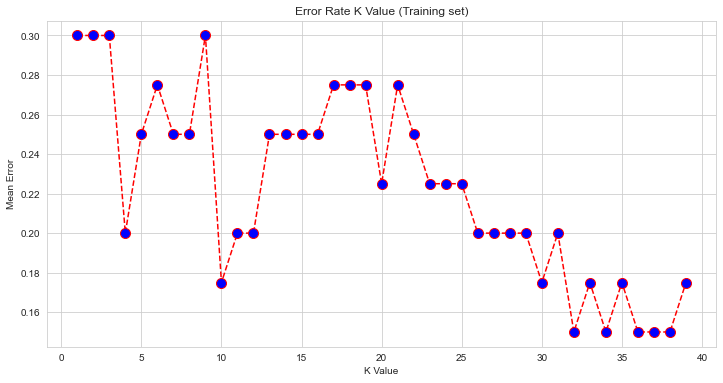

In [ ]:
# Using pyplot
# Plot a graph of mean error rate against K value

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value (Training set)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [ ]:
# Validation set
# Calculate mean error rate for K value from 1 to 40 

errorval = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    errorval.append(np.mean(pred_i != y_val))

Text(0, 0.5, 'Mean Error')

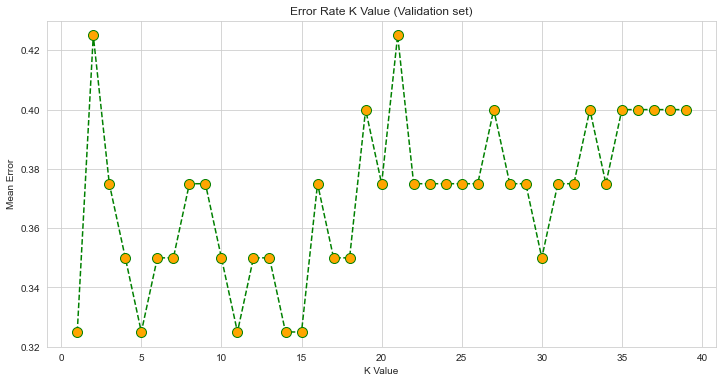

In [ ]:
# Using pyplot
# Plot a graph of mean error rate against K value

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), errorval, color='green', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=10)
plt.title('Error Rate K Value (Validation set)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


In [ ]:
# Testing set
# Calculate accuracy for K value from 1 to 40 

accuracy = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test,pred_i))

Text(0, 0.5, 'Accuracy')

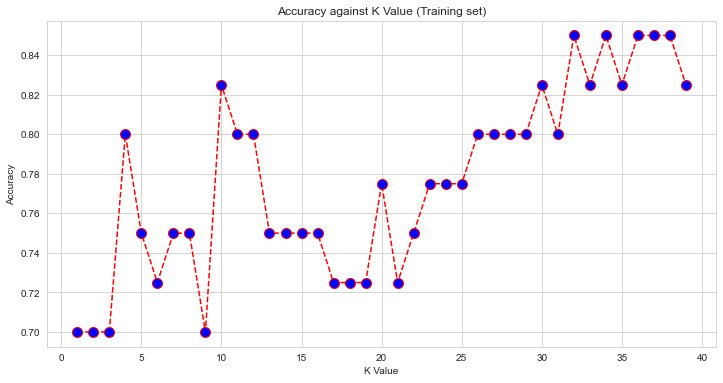

In [ ]:
# Using pyplot
# Plot a graph of Accuracy against K value

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy against K Value (Training set)')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [ ]:
# Validation set
# Calculate accuracy for K value from 1 to 40

accuracyval = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)
    accuracyval.append(accuracy_score(y_val,pred_i))

Text(0, 0.5, 'Accuracy')

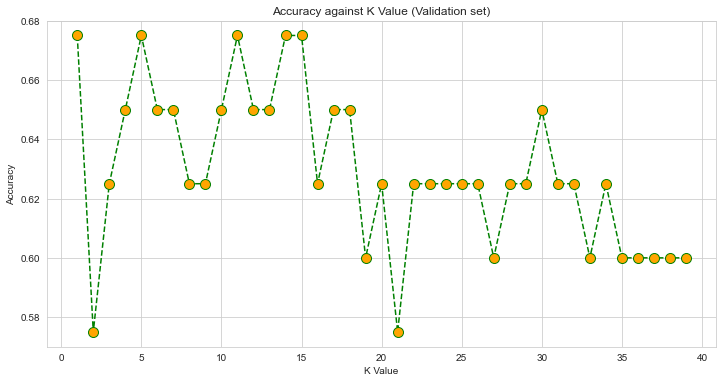

In [ ]:
# Using pyplot
# Plot a graph of Accuracy against K value

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), accuracyval, color='green', linestyle='dashed', marker='o',
         markerfacecolor='orange', markersize=10)
plt.title('Accuracy against K Value (Validation set)')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

Area under the ROC curve : 0.7365728900255754


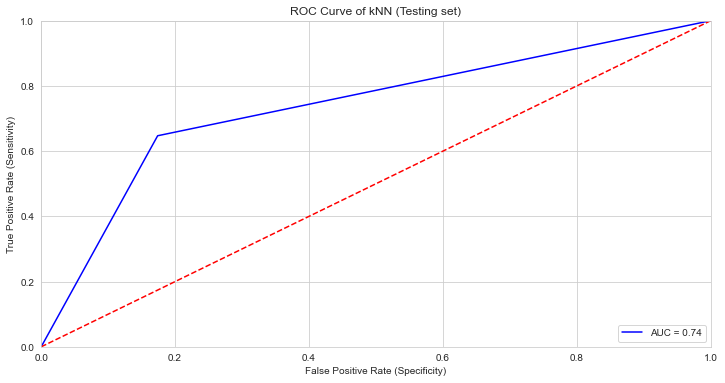

In [ ]:
# Using pyplot
# and ROC library 
# Plot a ROC curve of Testing set
# TPR against FPR 

fpr, tpr, threshold = roc_curve(y_test, ypred)
roc_auc = auc(fpr, tpr)
print('Area under the ROC curve : '+ str(roc_auc))

plt.figure(figsize=(12, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (Specificity)')
plt.title('ROC Curve of kNN (Testing set)')
plt.show()

Area under the ROC curve : 0.6666666666666667


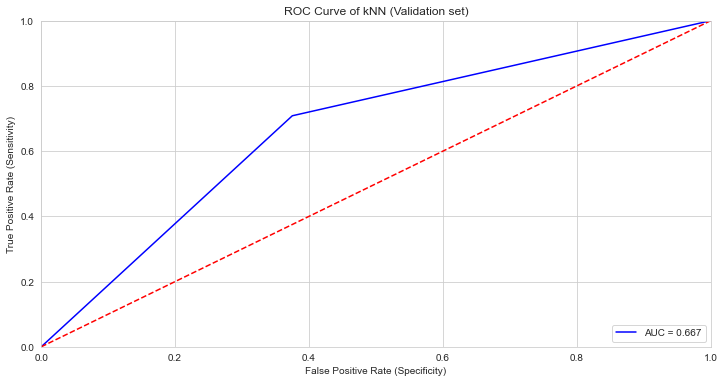

In [ ]:
# Using pyplot
# and ROC library 
# Plot a ROC curve of Validation set
# TPR against FPR 

fpr, tpr, threshold = roc_curve(y_val, ypredval)
roc_auc = auc(fpr, tpr)
print('Area under the ROC curve : '+ str(roc_auc))

plt.figure(figsize=(12, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (Specificity)')
plt.title('ROC Curve of kNN (Validation set)')
plt.show()

In [ ]:

# Extract column from dataset for X and y
# X contains "Cat Species","Gender","Age (Year(s))","Fur Color","Tameness","Disease Vaccination","Weight (Kg)"
# y contains 'Breed (P/M)'

X = data.iloc[:, :-1].values
y = data.iloc[:, 7].values

In [ ]:
# Split data into training set, testing set and cross validation set with portion 0.6 : 0.2 : 0.2
# Datasets are not process with minmax scaling because of 1 input

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

classifier = KNeighborsClassifier(n_neighbors=5)

classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# If customer enter one pet with all 7 features
# Using KNN to determine whether it is pure or mixed breed
# Can try with different set of features value
# Sample case: 


user_input= [[3. , 0. , 8.1, 1. , 5.7 , 1., 11.6]]
print("User Input is [[3. , 0. , 8.1, 1. , 5.7 , 1., 11.6]] ")

# Corresponding to:
#-------------------------------
# Cat Species - 3 [German Rex]
# Gender - 0 [Male]
# Age (Year(s)) - 8.1
# Fur Color - 1 [Chocolate]
# Tameness - 5.7
# Disease Vaccination - 1
# Weight (Kg) - 11.6


user_output = classifier.predict(user_input)


if user_output == 1 :
    print(" User Output : Mixed (1)")
else :
    print(" User Output : Pure (0)")
    
# Correct output should be Mixed (1)
print("\n\tCorrect Output : [Mixed (1)]")

User Input is [[3. , 0. , 8.1, 1. , 5.7 , 1., 11.6]] 
 User Output : Mixed (1)

	Correct Output : [Mixed (1)]


     Cat Species  Gender  Age (Year(s))  Fur Color  Tameness  \
0            0.0     0.0            9.5        0.0       5.4   
1            0.0     1.0            9.4        1.0       1.0   
2            0.0     0.0            6.3        2.0       2.1   
3            0.0     0.0            7.2        3.0       2.5   
4            0.0     1.0            8.1        4.0       1.1   
..           ...     ...            ...        ...       ...   
196          7.0     1.0           11.9        6.0       7.5   
197          7.0     1.0           10.8        7.0       9.7   
198          7.0     1.0           13.3        8.0       8.6   
199          7.0     1.0            9.4        9.0       6.8   
200          3.0     0.0            8.1        1.0       5.7   

     Disease Vaccination  Weight (Kg) Breed (P/M)  
0                    1.0          7.5           0  
1                    0.0          7.3           0  
2                    0.0         12.5           0  
3                    0.

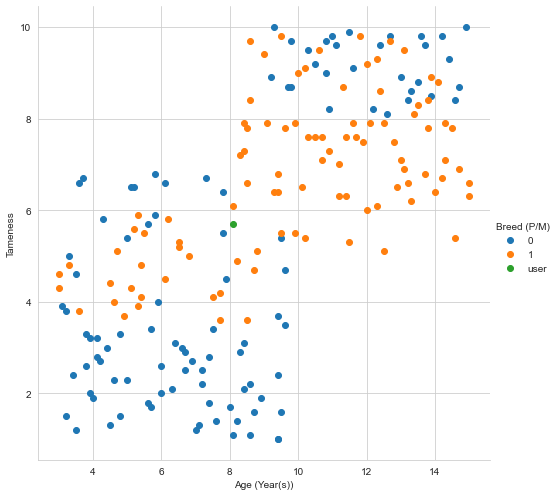

In [ ]:
# Put user input into dataframe for data visualization
# Plot user input in trainning set

user=np.array(['user'])
data2=X_data.append(pd.DataFrame(user_input, columns=['Cat Species','Gender','Age (Year(s))','Fur Color','Tameness','Disease Vaccination','Weight (Kg)']),ignore_index=True)
y2=np.append(y,user,axis=0)
data2['Breed (P/M)'] = y2.tolist()
print(data2)

sns.set_style("whitegrid");
h=sns.FacetGrid(data2, hue = 'Breed (P/M)', height=7).map(plt.scatter,"Age (Year(s))", "Tameness").add_legend();
h=h
plt.show()

In [ ]:
# Calculate Euclidean distance between two points
# Creating a function "euclideanDistance"

def euclideanDistance(cat1, cat2, length):
    distance = 0
    for x in range(length):
        distance += pow((cat1[x] - cat2[x]), 2)
    return math.sqrt(distance)

In [ ]:
# Get n nearest neighbor
# With different gender
# Creating another function "getKNeighbors"

def getKNeighbors(training_set, user_cat, n):
    distances = []
    length = len(user_cat)-1
    for x in range(len(training_set)):
        if( user_cat[1] != training_set[x][1]):
            dist = euclideanDistance(user_cat, training_set[x], length)
            distances.append((training_set[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(n):
        neighbors.append(distances[x][0])
    return neighbors

In [ ]:
training_set = X_train

# Convert 2D user input list to 1D list
user_cat = list(chain.from_iterable(user_input))
n = 1

neighbors = getKNeighbors(training_set, user_cat, n)
# Convert 2D neighbors list to 1D list
neighbors=list(chain.from_iterable(neighbors))

idx = X_data.values.tolist().index(neighbors)

# Get the neighbor from the original dataset
data1=pd.read_csv("Cat4.csv")
print('The best matching lover for your pet is: ')
print(data1.loc[idx,:])

The best matching lover for your pet is: 
Cat Species            German Rex
Gender                     Female
Age (Year(s))                 6.8
Fur Color                   Black
Tameness                        5
Disease Vaccination             0
Weight (Kg)                   8.8
Breed (P/M)                 Mixed
Name: 80, dtype: object
